In [48]:
# This code imports some of the libraries we need.
import pandas as pd
import numpy as np
from scipy.stats import norm

In [49]:
# This code imports the data.
df = pd.read_csv("kickstarter.csv")

C:\Users\scifi\AppData\Local\Temp\ipykernel_16452\3668379741.py:2: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("kickstarter.csv")


In [50]:
# This code shows us the first five entries in the data frame. 
df.head()

,category,state,backers,country,usd pledged,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Publishing,failed,0,GB,0,NaN,NaN,NaN,NaN
1,Film & Video,failed,3,US,220,NaN,NaN,NaN,NaN
2,Music,failed,1,US,1,NaN,NaN,NaN,NaN
3,Film & Video,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,Food,successful,224,US,52375,NaN,NaN,NaN,NaN


In [51]:
# This code lets us see all of the values we want. 
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [52]:
# This code computes the number of times each category appears in the data frame. 
df['category'].value_counts()

category
Film & Video               57679
Music                      46744
Publishing                 34233
Games                      28008
Technology                 26128
Art                        23975
Design                     23872
Food                       21229
Fashion                    18398
Theater                     9972
Photography                 9680
Comics                      8753
Crafts                      7187
Journalism                  4073
Dance                       3375
Fiction                       35
Product Design                29
Documentary                   28
Nonfiction                    27
Children's Books              18
Tabletop Games                14
Shorts                        13
Video Games                   12
Mixed Media                   11
Art Books                     10
Apparel                       10
Web                            8
Narrative Film                 8
Webseries                      7
Hip-Hop                        7
C

In [53]:
# This creates a new data frame by filtering the original data frame by the category, in this case to specifically get 'Food' kickstarters. 
tech = df[df['category'] == 'Technology']
tech.head()

,category,state,backers,country,usd pledged,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
57,Technology,failed,0,CA,0,NaN,NaN,NaN,NaN
61,Technology,canceled,15,US,2030,NaN,NaN,NaN,NaN
62,Technology,failed,3,US,100,NaN,NaN,NaN,NaN
88,Technology,failed,3,CA,2.41110072,NaN,NaN,NaN,NaN
94,Technology,canceled,19,CA,9240.736853,NaN,NaN,NaN,NaN


In [54]:
# This tells us the number of Food kickstarters.
len(tech)

26128

In [55]:
# This tells us how many successful Food kickstarters there are.
len(tech[tech['state']=='successful'])

5062

In [56]:
# This code lets us see the different 'state' values for Food kickstarters. Notice how some of these make sense, while others are not useful. 
tech['state'].value_counts()

state
failed        16347
successful     5062
canceled       3749
live            632
suspended       323
undefined         3
0                 2
2408              1
12                1
39                1
5                 1
14159             1
741               1
7492              1
130               1
1                 1
19224             1
Name: count, dtype: int64

The "state" that most concerns me are the projects that have been cancelled, because there could have been many great ideas, that never took off, for whatever reason. However, I intend to determine a success rate if we only take into account the projects that failed, and the projects that succeeded. Afterwards, I want to take the total of the projects that succeeded and failed, and calculate the proportion of those that succeeded.

In [57]:
techsuccess=len(tech[tech['state']=='successful'])
techgeneral=len(tech)
techsuccessgeneralprobability=techsuccess/techgeneral

print("Proportion of technology kickstarters that are successful: "+str(techsuccessgeneralprobability))

Proportion of technology kickstarters that are successful: 0.1937385180649112


In [58]:

techfailure=len(tech[tech['state']=='failed'])

techsecondgeneral=int(techsuccess)+int(techfailure)

techsuccessprobability=techsuccess/techsecondgeneral

print("Proportion of technology kickstarters that are successful: "+str(techsuccessprobability))

Proportion of technology kickstarters that are successful: 0.23644261759073287


Critical Value Method: Reject the null hypothesis
P-value Method: Reject the null hypothesis
P-value: 0.0


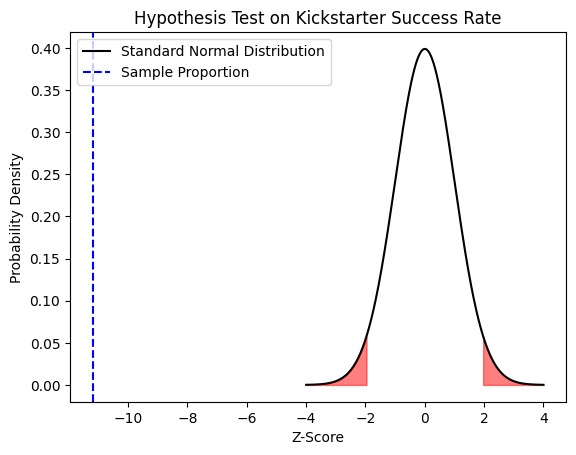

In [59]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to perform hypothesis test
def hypothesis_test(p_sample, p_kickstarter, n, alpha):
    # Critical value method
    z_critical = stats.norm.ppf(1 - alpha/2)
    z = (p_sample - p_kickstarter) / np.sqrt((p_kickstarter*(1 - p_kickstarter))/n)
    if np.abs(z) > z_critical:
        print("Critical Value Method: Reject the null hypothesis")
    else:
        print("Critical Value Method: Fail to reject the null hypothesis")
    
    # P-value method
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))
    if p_value < alpha:
        print("P-value Method: Reject the null hypothesis")
    else:
        print("P-value Method: Fail to reject the null hypothesis")
    print("P-value:", p_value)
    
    # Plot normal distribution
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x, 0, 1)
    plt.plot(x, y, 'k', label='Standard Normal Distribution')
    plt.fill_between(x, 0, y, where=(x <= -z_critical), color='red', alpha=0.5)
    plt.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.5)
    plt.axvline(x=z, color='blue', linestyle='--', label='Sample Proportion')
    plt.xlabel('Z-Score')
    plt.ylabel('Probability Density')
    plt.title('Hypothesis Test on Kickstarter Success Rate')
    plt.legend()
    plt.show()

# Sample statistics
p_sample = 0.19  # Sample proportion
p_kickstarter = 0.36  # Population proportion for Kickstarter
n = 1000  # Sample size
alpha = 0.05  # Significance level

# Perform hypothesis test and plot results
hypothesis_test(p_sample, p_kickstarter, n, alpha)


I would absolutely not try a kickstarter project in technology, as the probability of success is simply to small, compared to the average for the website. I would either use a different website, or develop a product other than technology.